## Eda principal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Conectar a la base de datos
con = sqlite3.connect("Proyecto_filtrada.db")
#  cuántas filas hay
total = pd.read_sql("SELECT COUNT(*) AS total_filas FROM santander_trimestre;", con)
print(total)

   total_filas
0      1183139


In [3]:
import pandas as pd
con = sqlite3.connect("Proyecto_filtrada.db")

df= pd.read_sql("""SELECT * FROM santander_trimestre """, con)
df.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-03-28,466167,N,ES,H,60,2004-03-29,0.0,144,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2016-03-28,1419835,N,ES,V,21,2015-07-28,0.0,8,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2016-03-28,1242168,N,ES,V,40,2014-02-06,0.0,25,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2016-03-28,1442576,N,ES,H,24,2015-09-06,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2016-03-28,1442580,N,ES,V,47,2015-09-06,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2016-03-28,1442582,N,ES,H,36,2015-09-06,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2016-03-28,1442583,N,ES,V,20,2015-09-06,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2016-03-28,1442584,N,ES,H,27,2015-09-06,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
8,2016-03-28,1442585,N,ES,H,40,2015-09-06,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2016-03-28,1442586,N,ES,V,31,2015-09-06,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [5]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [5]:
df.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183139 entries, 0 to 1183138
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1183139 non-null  object 
 1   ncodpers               1183139 non-null  int64  
 2   ind_empleado           1183139 non-null  object 
 3   pais_residencia        1183139 non-null  object 
 4   sexo                   1183127 non-null  object 
 5   age                    1183139 non-null  object 
 6   fecha_alta             1183139 non-null  object 
 7   ind_nuevo              1183139 non-null  float64
 8   antiguedad             1183139 non-null  object 
 9   indrel                 1183139 non-null  float64
 10  ult_fec_cli_1t         311 non-null      object 
 11  indrel_1mes            1178666 non-null  object 
 12  tiprel_1mes            1178666 non-null  object 
 13  indresi                1183139 non-null  object 
 14  indext            

# sexo , age , indrel numericas pero son object

## Eliminar duplicados

In [4]:
df.duplicated().sum()
duplicated_rows = df[df.duplicated()]
print(f'Número de filas duplicadas: {duplicated_rows.shape[0]}')


Número de filas duplicadas: 0


In [5]:
# Eliminar duplicados / segunda forma
df_cleaned = df.drop_duplicates()

# Confirmar que ya no hay duplicados
print(f'Shape data set : {df.shape}')
print(f'Shape data set sin duplicados: {df_cleaned.shape}')

Shape data set : (1183139, 48)
Shape data set sin duplicados: (1183139, 48)


## Eliminar columnas irrelevante
Identificar columnas con valores nulos

In [6]:
df.isnull().sum().sort_values(ascending=False)

conyuemp                 1182861
ult_fec_cli_1t           1182828
renta                     269367
cod_prov                    6499
nomprov                     6499
segmento                    5626
canal_entrada               5509
indrel_1mes                 4473
tiprel_1mes                 4473
sexo                          12
age                            0
fecha_alta                     0
ind_nuevo                      0
fecha_dato                     0
ind_empleado                   0
ncodpers                       0
indext                         0
indresi                        0
indrel                         0
antiguedad                     0
pais_residencia                0
indfall                        0
tipodom                        0
ind_actividad_cliente          0
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

## Se eliminan las columnas con más nulos:

In [7]:
df.drop(['conyuemp', 'ult_fec_cli_1t'], axis=1, inplace=True)


## Imputación de nulos en la columna renta :

In [ ]:
df['renta'].fillna(df['renta'].median(), inplace=True)  # Mediana 


## Imputación de nulos en las columnas categoricas

cod_prov               1176640 non-null  float64

segmento               1177513 non-null  object 

canal_entrada          1177630 non-null  object 

nomprov                1176640 non-null  object 

In [ ]:
df['canal_entrada'].fillna("DESCONOCIDO", inplace=True)
df['segmento'].fillna("DESCONOCIDO", inplace=True)
df['cod_prov'].fillna(-1, inplace=True)  #numérico  PENDIENTE REVISAR 
df['nomprov'].fillna("DESCONOCIDO", inplace=True)

## Columna sexo

In [10]:
df['sexo'].fillna(df['sexo'].mode()[0], inplace=True)


/tmp/ipykernel_38958/2382602630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sexo'].fillna(df['sexo'].mode()[0], inplace=True)


#PENDIENTE IMPUTAR YA QUE SON COLUMNAS CATEGORICAS

<!-- indrel_1mes                 4473
tiprel_1mes                 4473

11  indrel_1mes            1178666 non-null  object 
2  tiprel_1mes            1178666 non-null  object -->

In [ ]:
# df['indrel_1mes'].fillna(df['indrel_1mes'].median(), inplace=True)  # Mediana 

# df['tiprel_1mes'].fillna(df['indrel_1mes'].median(), inplace=True)  # Mediana 

## Identificar y guardar columnas por tipo para posterior análisis

In [11]:
var_categoricas = []
var_numericas= []

for col in df.columns:
    if df[col].dtype == 'object':
        var_categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        var_numericas.append(col)

print("Variables categóricas:")
print(var_categoricas)

print("\n")
print("Variables numéricas:")
print(var_numericas)


Variables categóricas:
['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']


Variables numéricas:
['ncodpers', 'ind_nuevo', 'indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


## Convertir a numéricas las categoricas

In [12]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [13]:
df['antiguedad'] = pd.to_numeric(df['antiguedad'], errors='coerce')

## Convertir columnas de fecha a datetime

In [14]:
# Convertir columnas de fecha a tipo datetime
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'], format='%Y-%m-%d', errors='coerce')
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], format='%Y-%m-%d', errors='coerce')


In [ ]:
# df['año'] = df['fecha_dato'].dt.year
# df['mes'] = df['fecha_dato'].dt.month


In [15]:
var_categoricas = []
var_numericas = []
var_fechas = []

for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        var_fechas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        var_numericas.append(col)
    elif df[col].dtype == 'object':
        var_categoricas.append(col)

print("Variables de tipo fecha:")
print(var_fechas)

print("Variables categóricas:")
print(var_categoricas)

print("Variables numéricas:")
print(var_numericas)


Variables de tipo fecha:
['fecha_dato', 'fecha_alta']
Variables categóricas:
['ind_empleado', 'pais_residencia', 'sexo', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']
Variables numéricas:
['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


## Analisis univariable

ind_empleado
N    0.998943
B    0.000376
A    0.000352
F    0.000327
S    0.000003
Name: proportion, dtype: float64


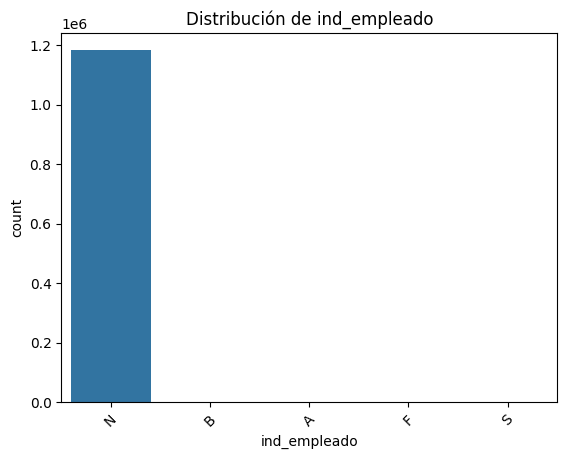

pais_residencia
ES    0.994505
GB    0.000524
FR    0.000503
DE    0.000483
AR    0.000444
US    0.000375
CH    0.000249
VE    0.000227
IT    0.000210
CO    0.000209
Name: proportion, dtype: float64


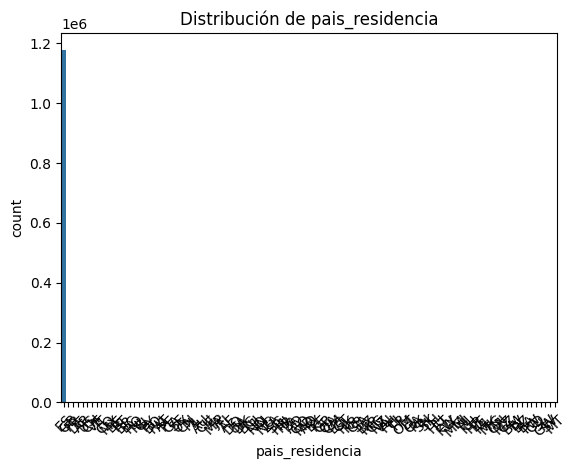

sexo
V    0.570746
H    0.429254
Name: proportion, dtype: float64


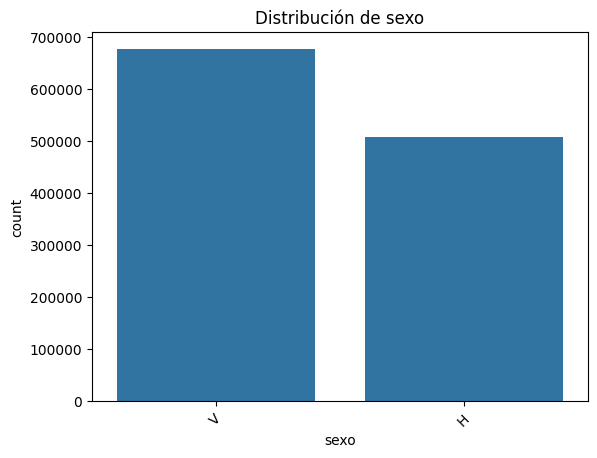

indrel_1mes
1.0    0.999388
3.0    0.000364
2.0    0.000120
P      0.000096
4.0    0.000032
Name: proportion, dtype: float64


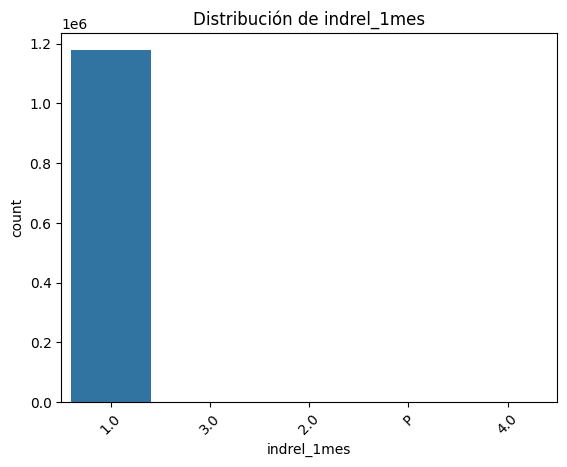

tiprel_1mes
A    0.900368
I    0.099140
P    0.000396
R    0.000096
Name: proportion, dtype: float64


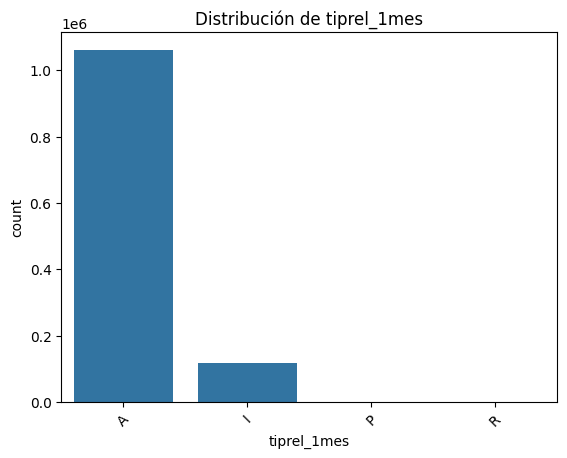

indresi
S    0.994504
N    0.005496
Name: proportion, dtype: float64


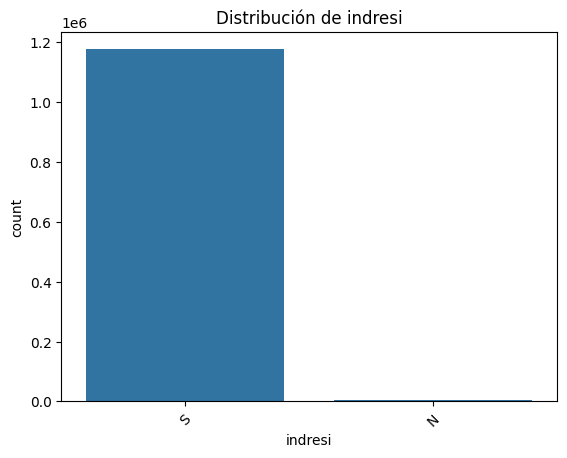

indext
N    0.955972
S    0.044028
Name: proportion, dtype: float64


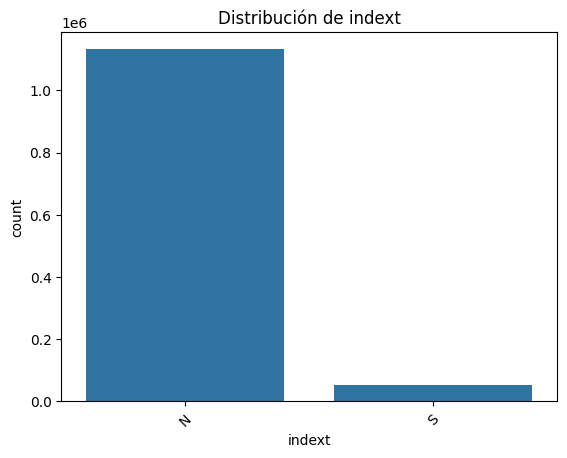

canal_entrada
KAT    0.281456
KFC    0.257847
KHE    0.150287
KHQ    0.053619
KHM    0.047811
KFA    0.039305
KHN    0.029817
KHK    0.024201
RED    0.012632
KAS    0.006989
Name: proportion, dtype: float64


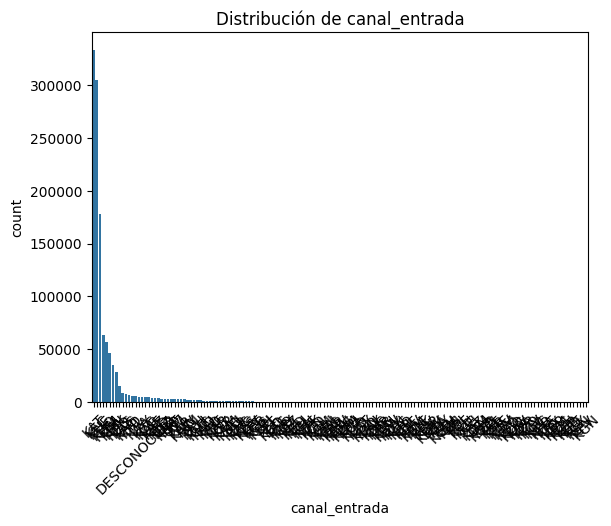

indfall
N    0.997519
S    0.002481
Name: proportion, dtype: float64


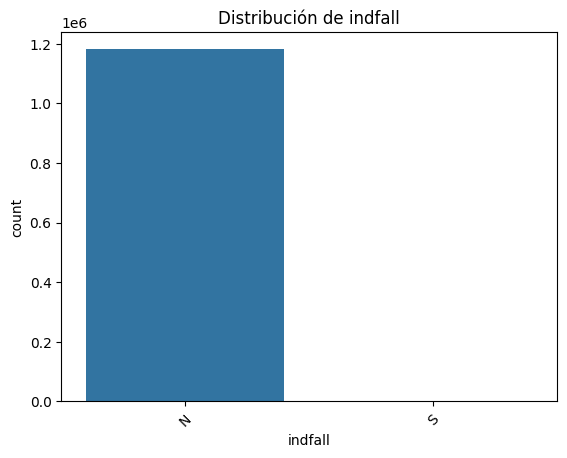

nomprov
MADRID        0.385115
BARCELONA     0.079680
VALENCIA      0.045257
SEVILLA       0.038493
CORUÑA, A     0.032977
ALICANTE      0.022450
MALAGA        0.021320
ZARAGOZA      0.021074
PONTEVEDRA    0.020998
MURCIA        0.019248
Name: proportion, dtype: float64


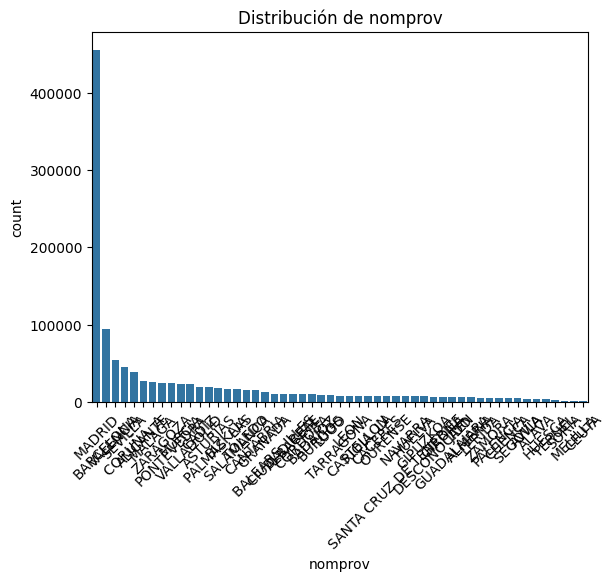

segmento
02 - PARTICULARES     0.658952
03 - UNIVERSITARIO    0.248464
01 - TOP              0.087828
DESCONOCIDO           0.004755
Name: proportion, dtype: float64


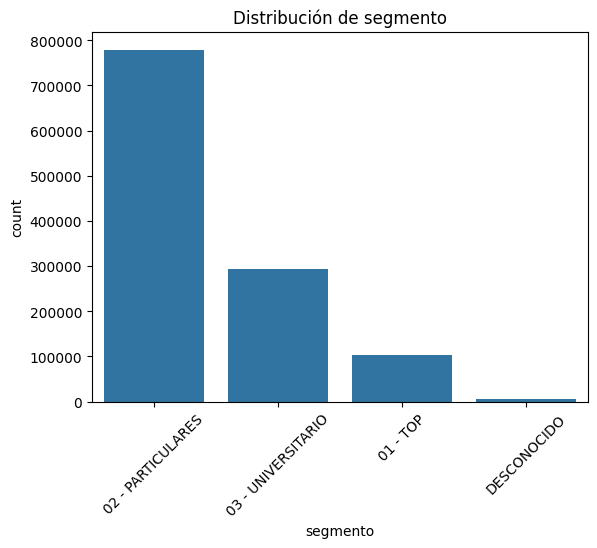

In [21]:
import seaborn as sns

for col in var_categoricas:
    print(df[col].value_counts(normalize=True)[:10])  # top 10
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


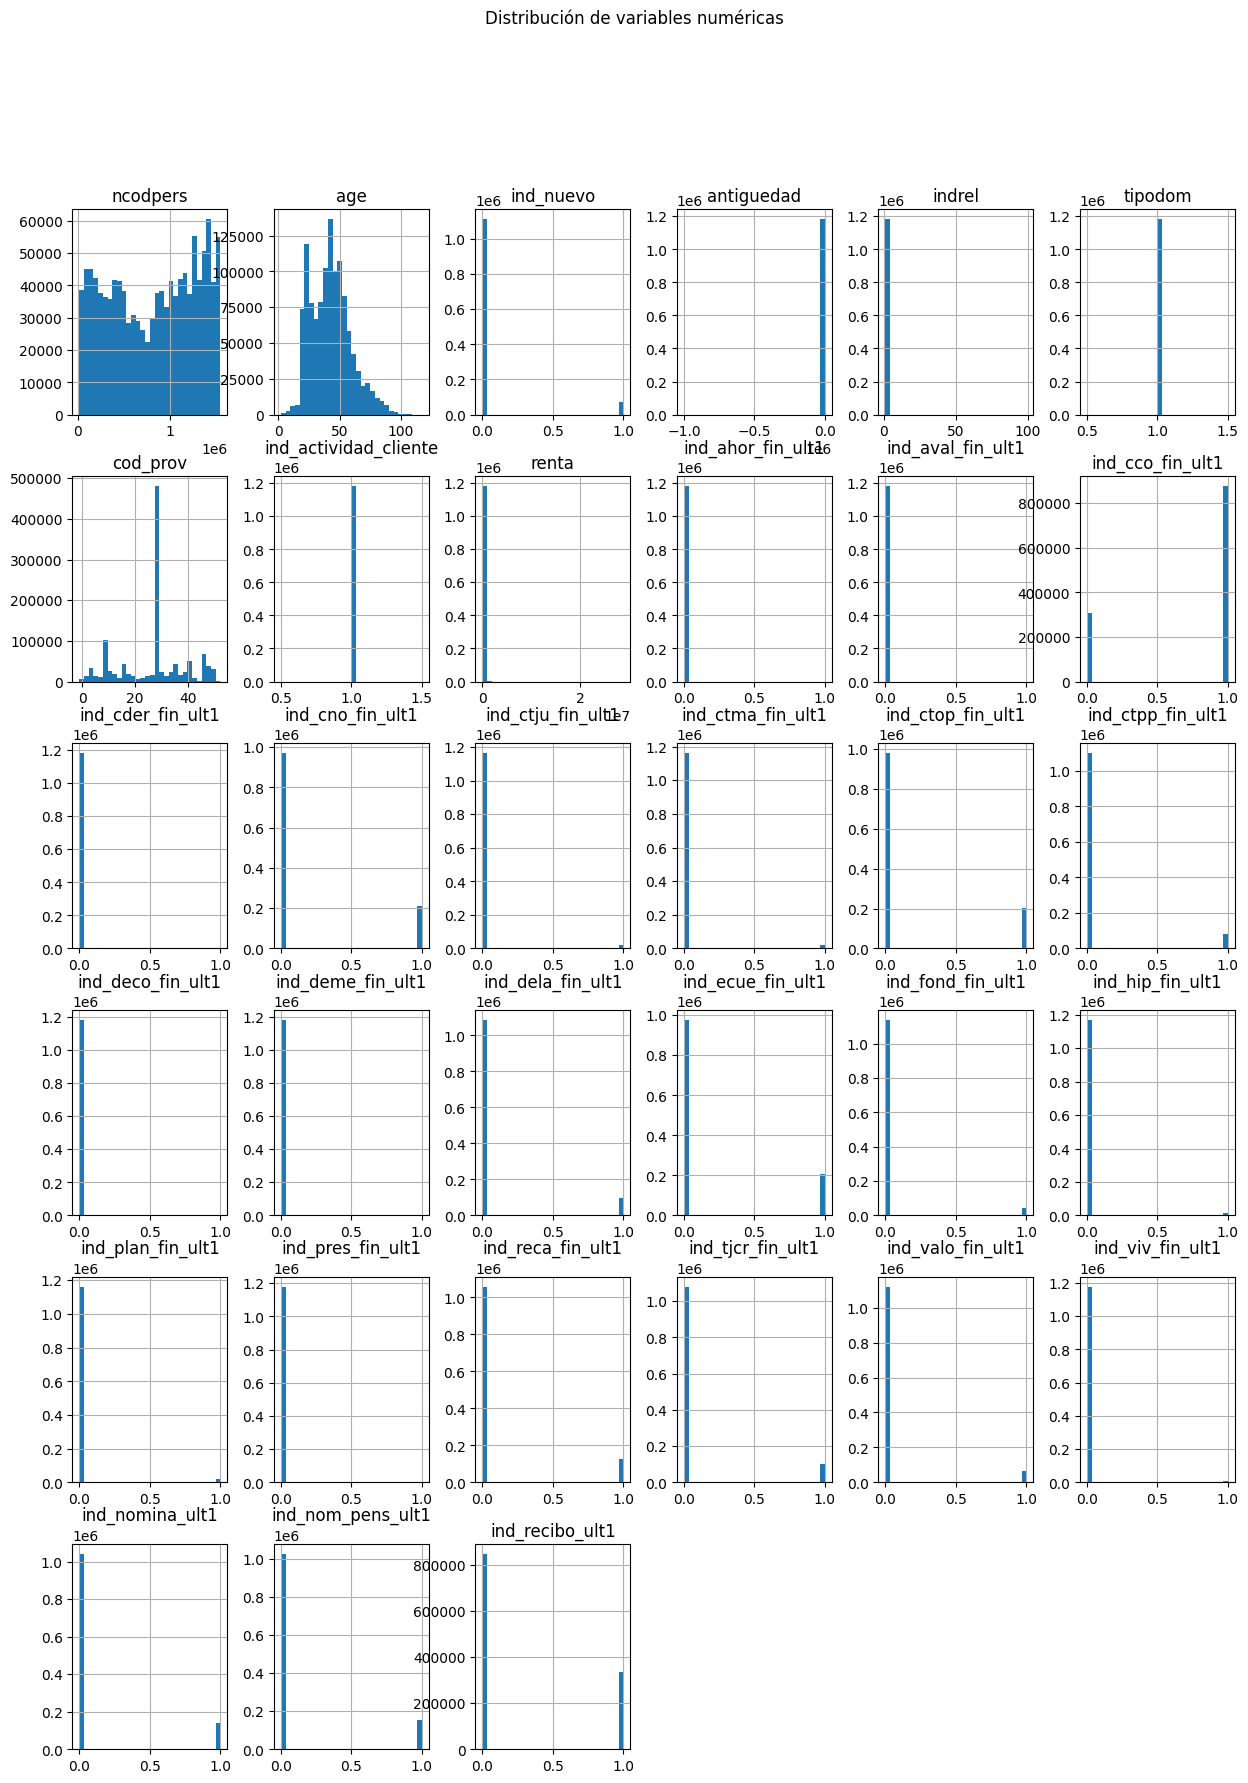

In [ ]:
df[var_numericas].describe().T
df[var_numericas].hist(bins=30, figsize=(15, 20))
plt.suptitle("Distribución de variables numéricas")
plt.show()

In [18]:
df['antiguedad'].unique()


array([    144,       8,      25,       6,      21,      13,       2,
             4,       7,       3,       1,       5,       0,       9,
            72,      11,      24,      10,      33,      14,      19,
            12,      15,      16,      17,      18,      26,      20,
            22,      23,     117,     217,      32,     192,     191,
           190,     183,     177,      97,     180,      96,      40,
           132,     185,     169,     206,     114,      60,     176,
           189,     147,     104,     181,     193,     182,     143,
           171,      91,      88,      37,     170,     139,      34,
           219,     172,     101,     187,     168,     204,     186,
           173,      73,      92,     158,     178,     164,      76,
            46,     196,     184,     148,     167,     188,     153,
            98,     174,      29,     162,     154,     161,     116,
           126,      36,     135,     159,     160,      74,     163,
           122,     

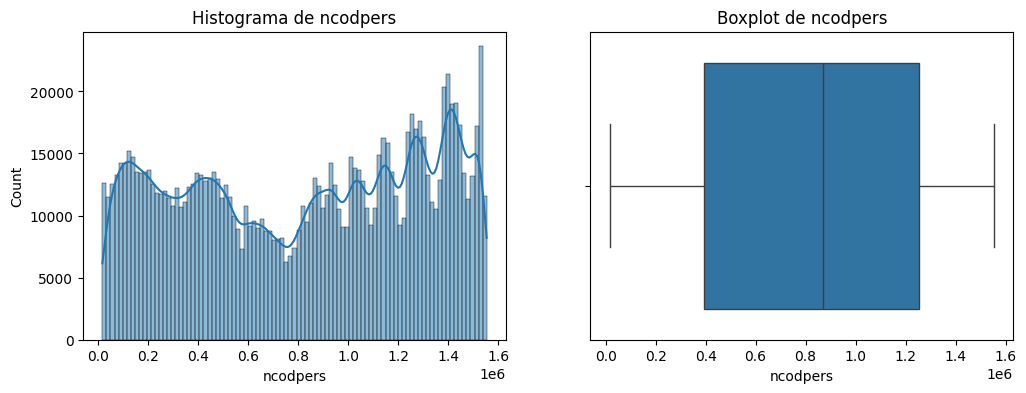

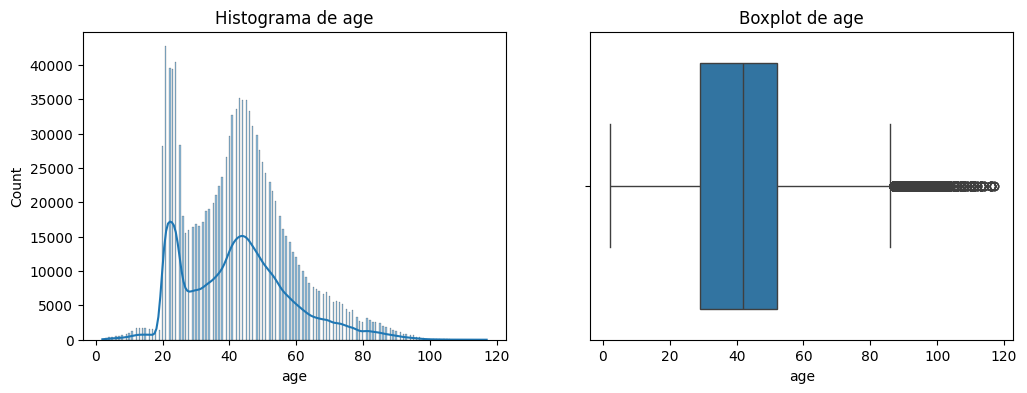

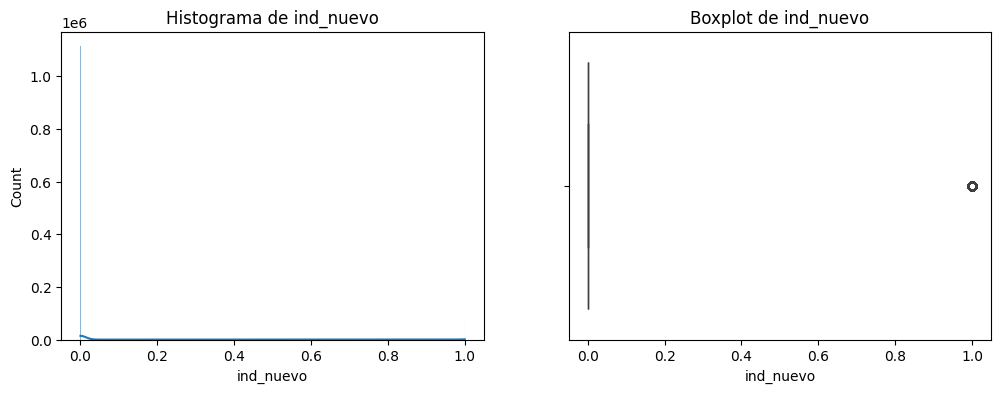

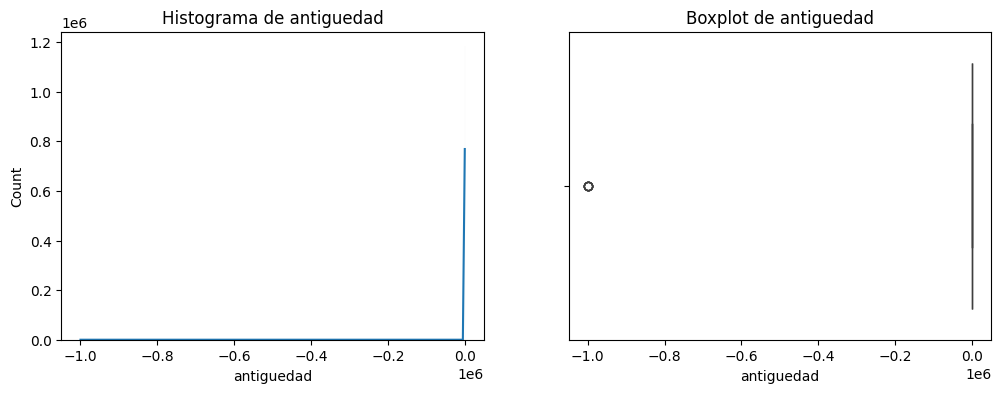

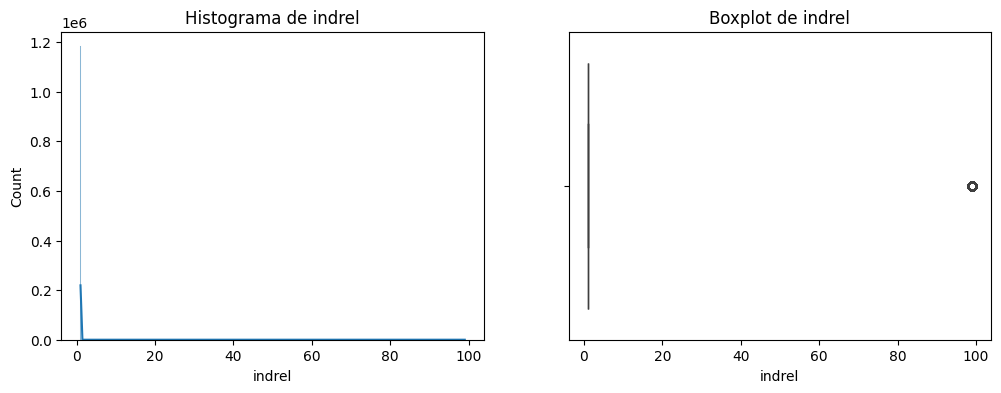

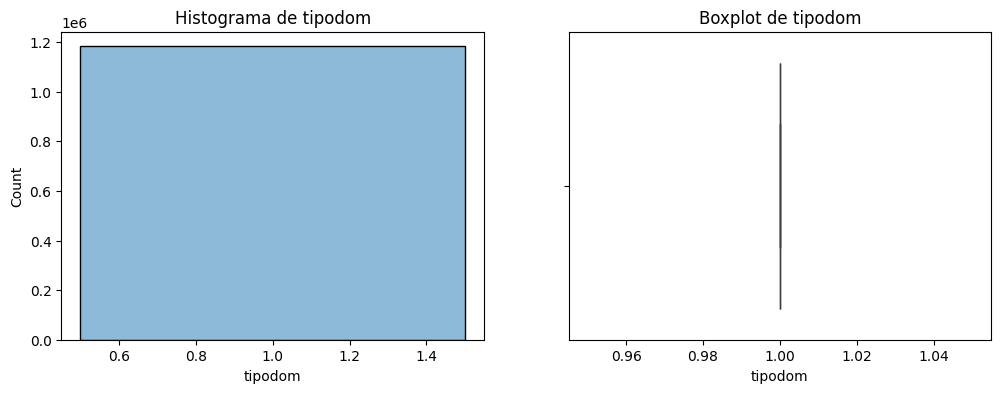

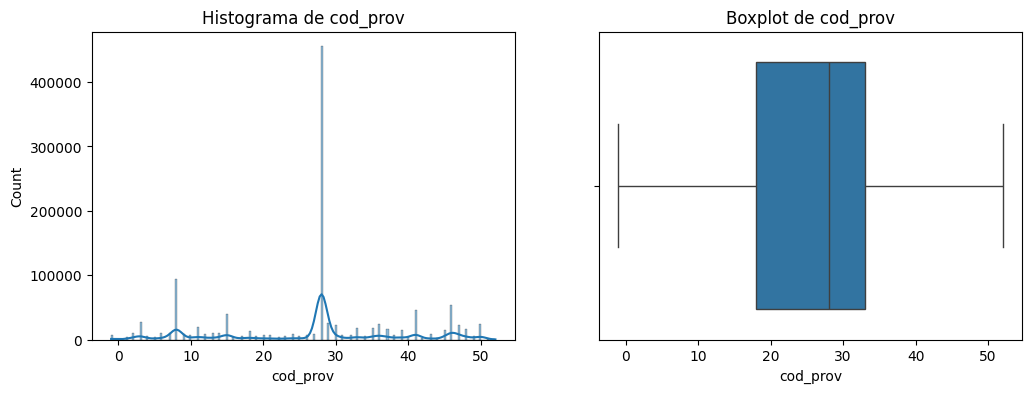

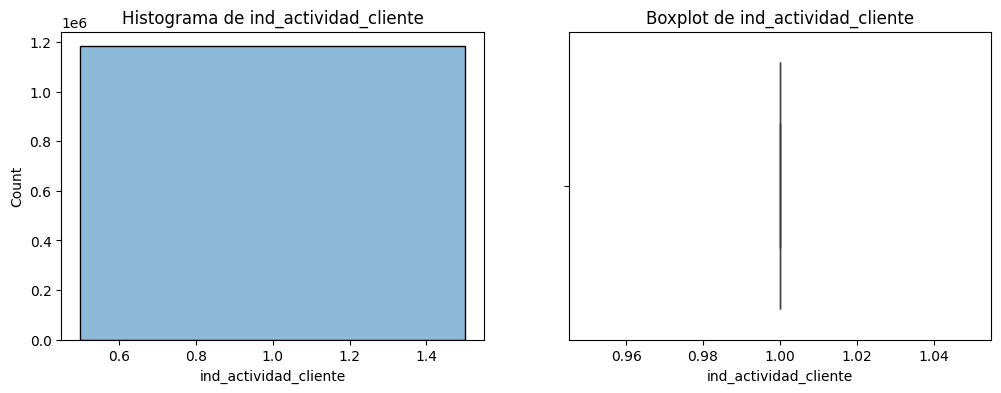

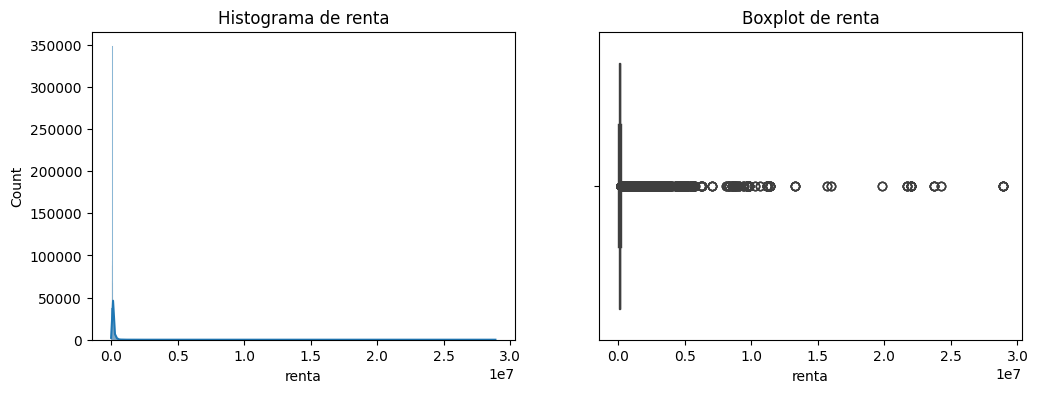

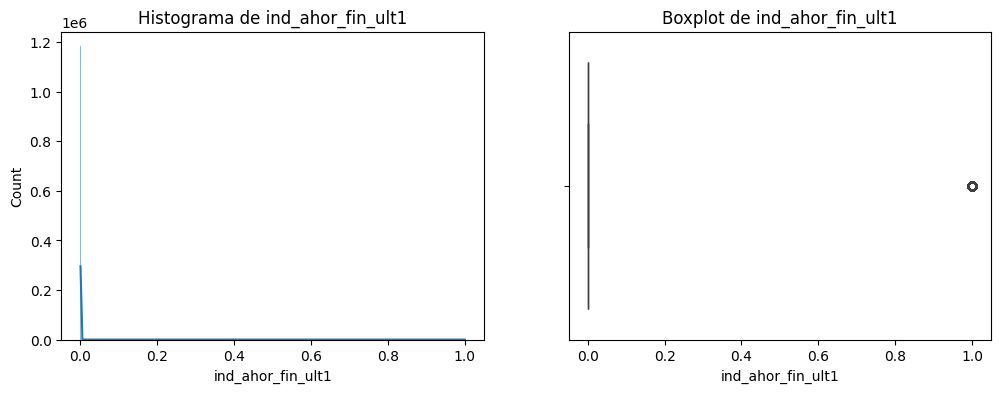

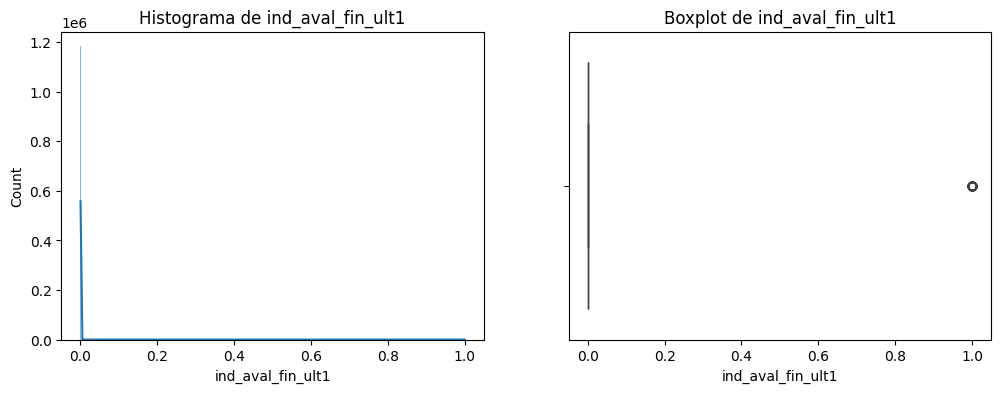

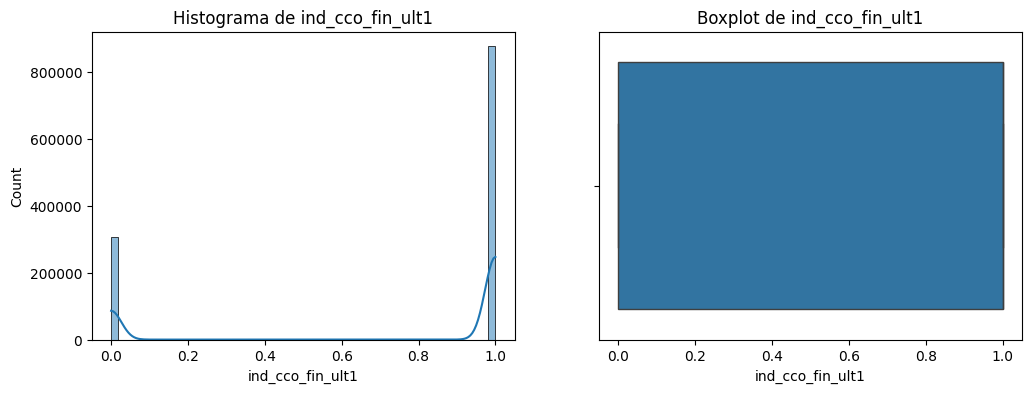

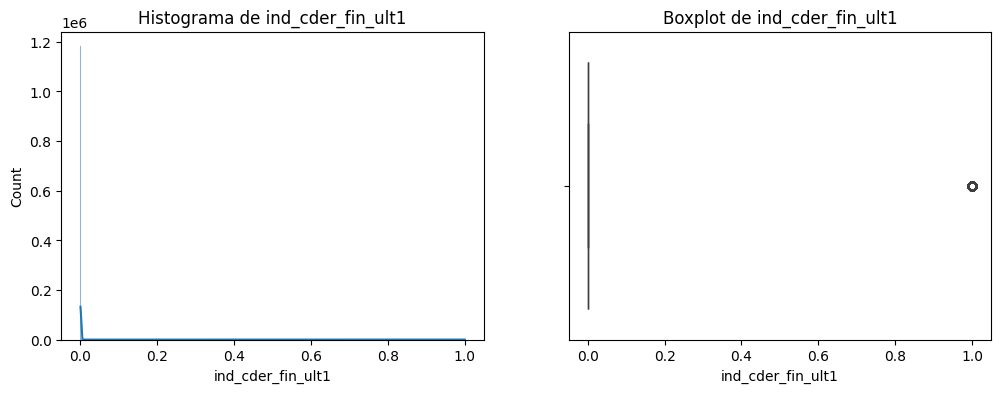

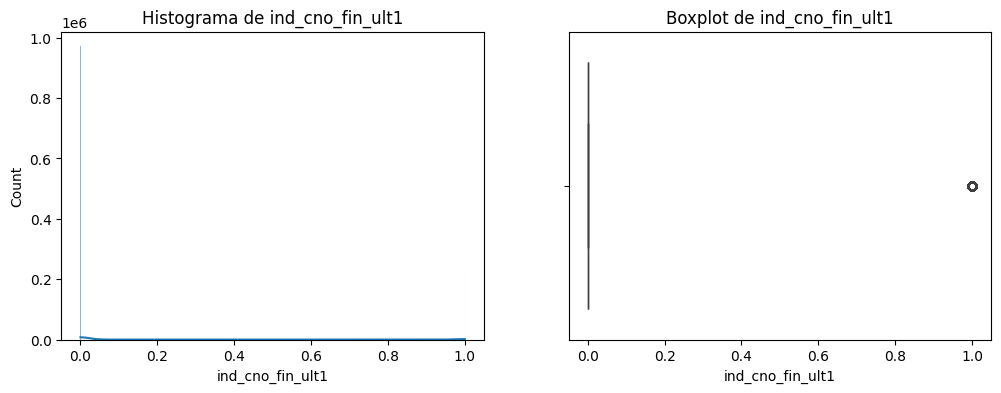

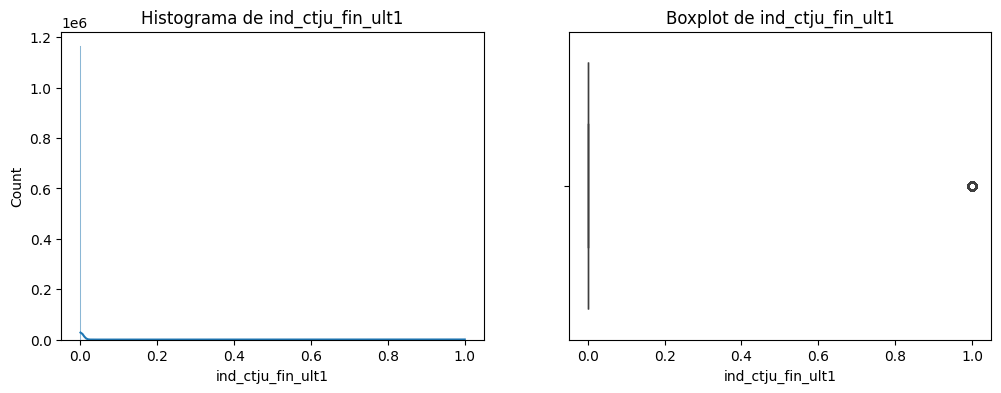

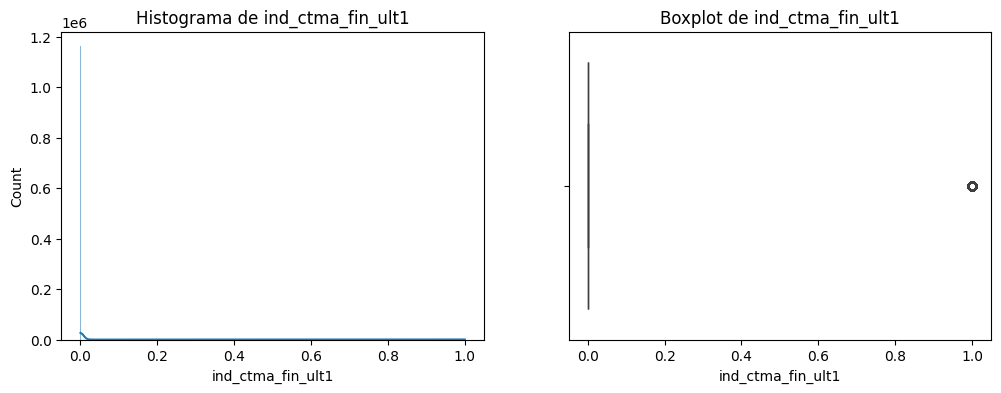

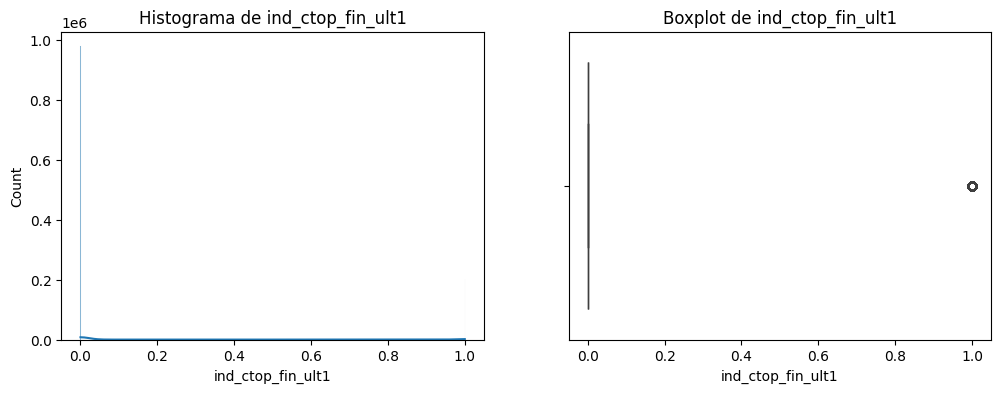

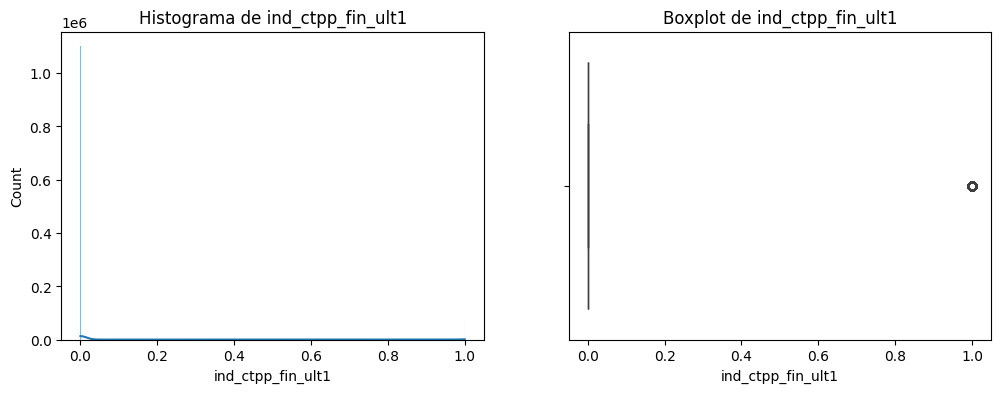

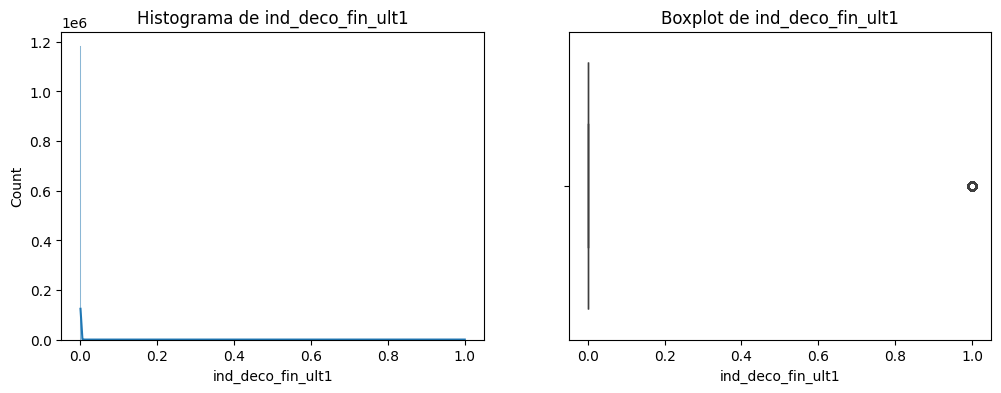

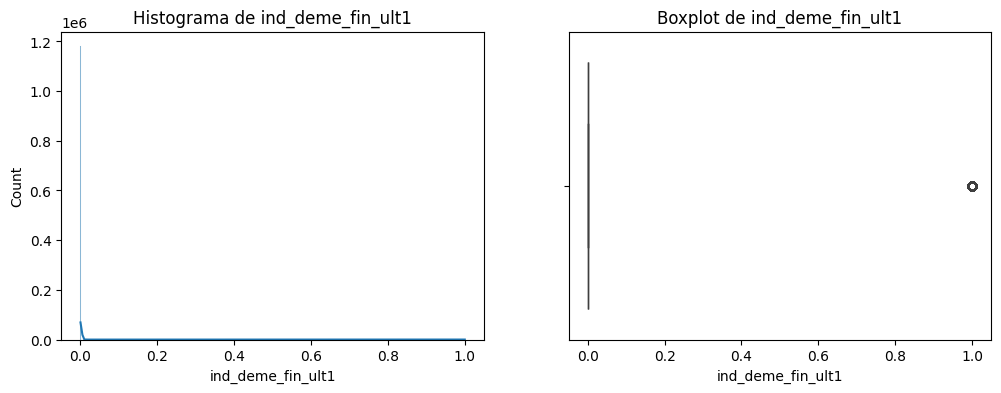

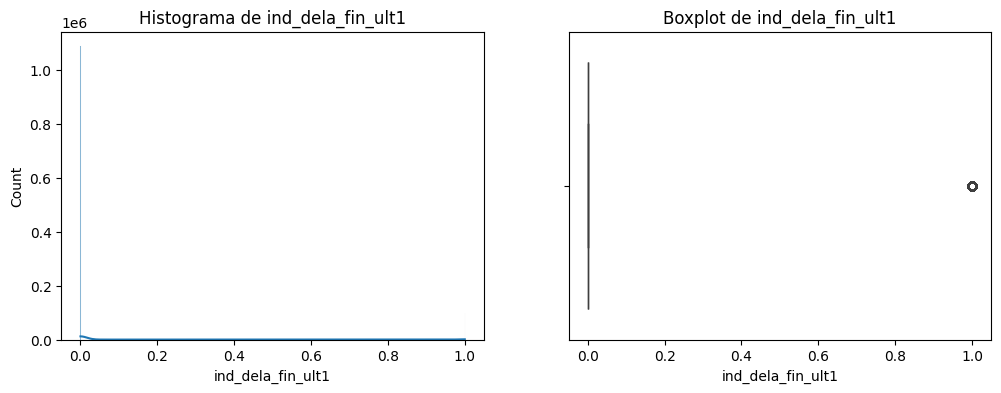

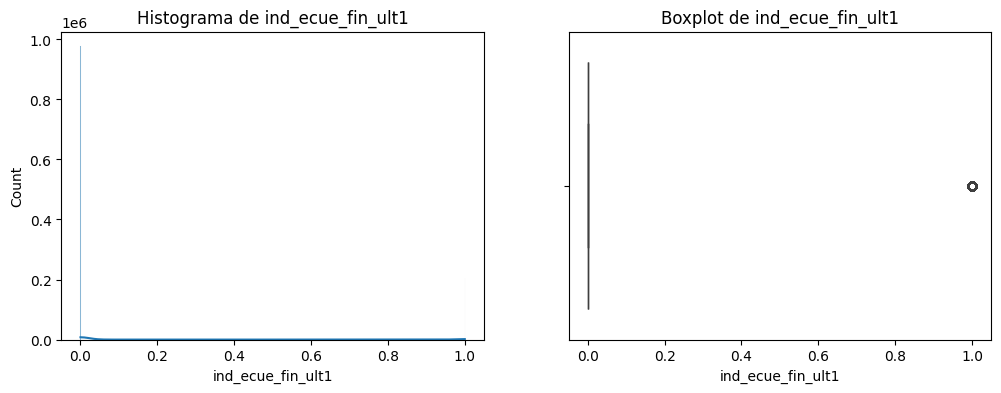

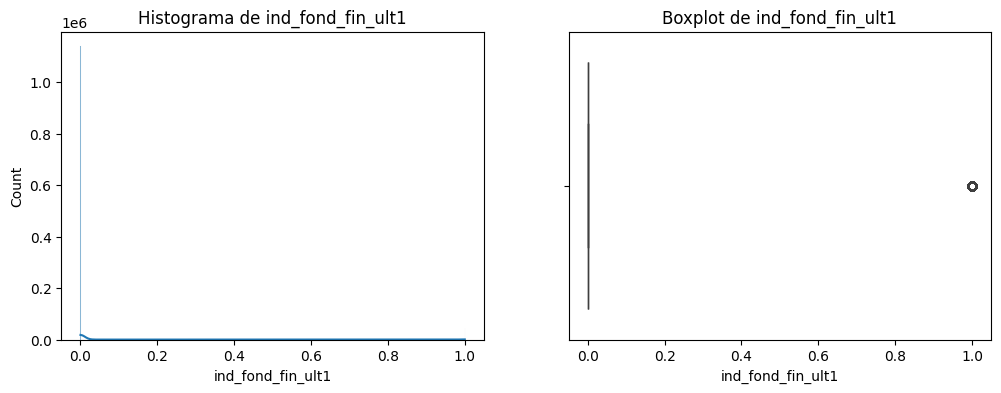

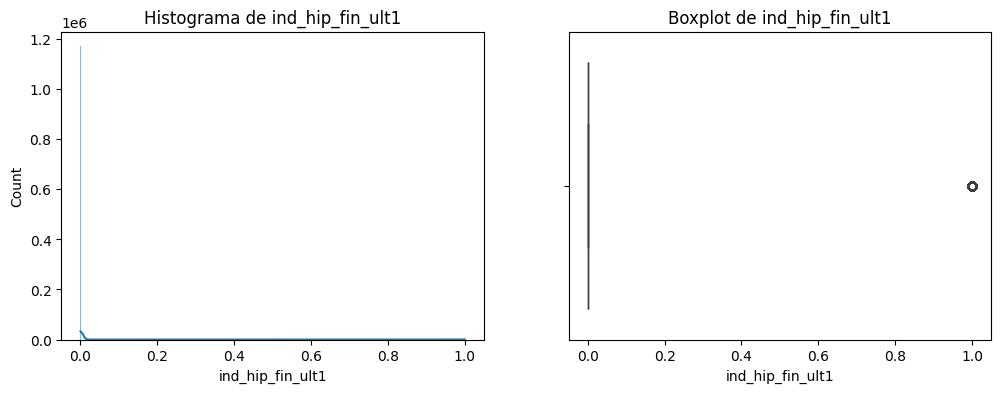

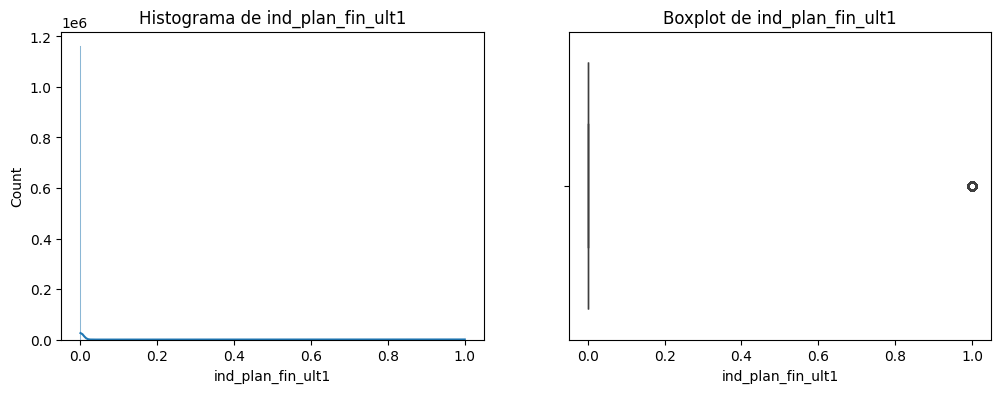

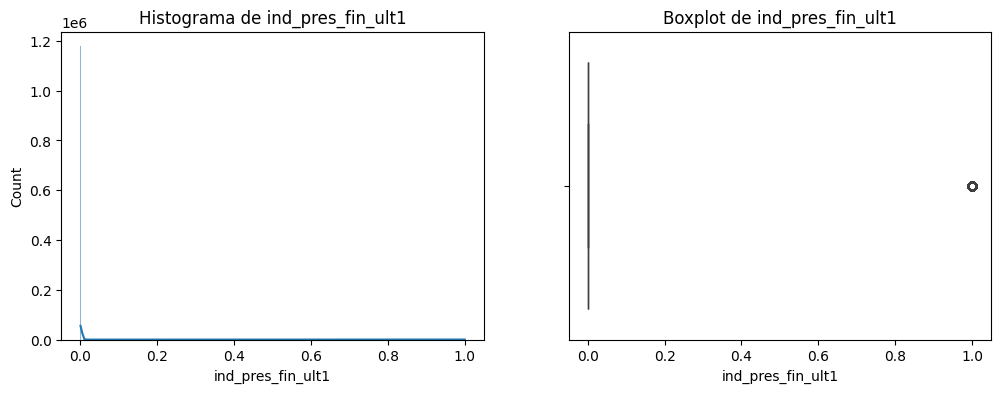

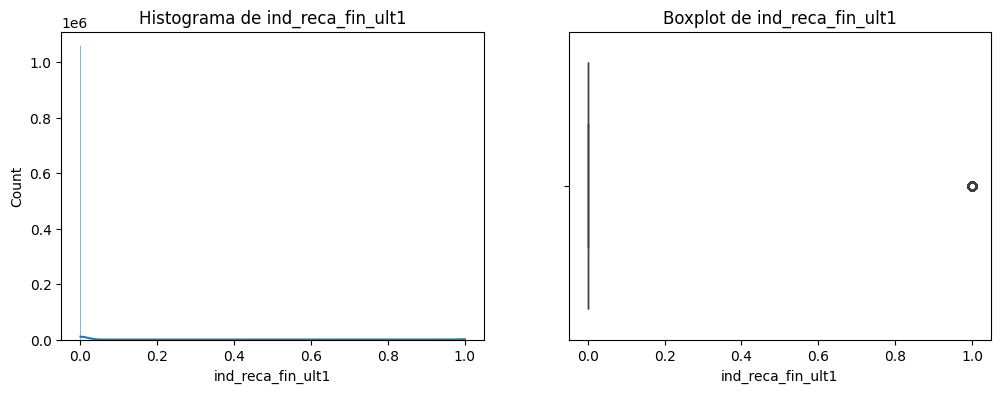

KeyboardInterrupt: 

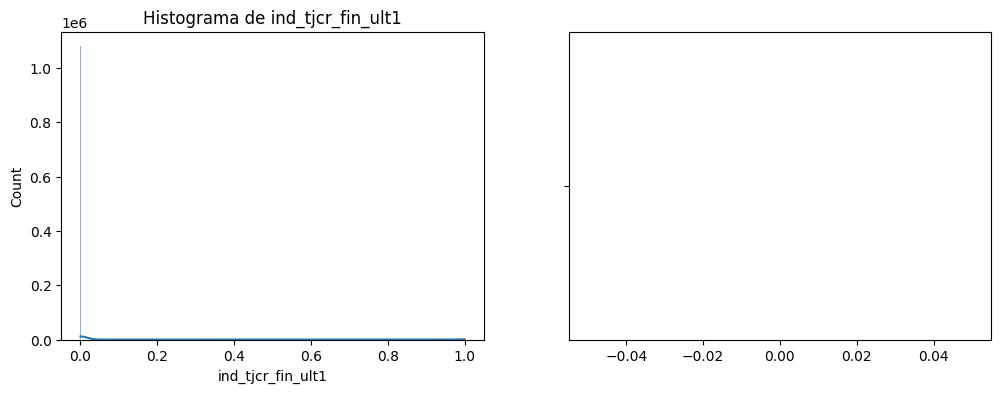

In [22]:
import seaborn as sns

for col in var_numericas:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


## Analisis de valores atipicos por porcentaje en cada columna usando el rango intercuartilico, se considera outlier todo lo que este fuera del rango

In [16]:
def porcentaje_outliers(df):
    porcentajes = {}
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        porcentaje = len(outliers) / len(df) * 100
        porcentajes[col] = round(porcentaje, 2)

    return porcentajes

# Resultado
print(porcentaje_outliers(df))

{'ncodpers': 0.0, 'age': 1.04, 'ind_nuevo': 5.86, 'antiguedad': 0.0, 'indrel': 0.03, 'tipodom': 0.0, 'cod_prov': 0.0, 'ind_actividad_cliente': 0.0, 'renta': 8.47, 'ind_ahor_fin_ult1': 0.01, 'ind_aval_fin_ult1': 0.0, 'ind_cco_fin_ult1': 0.0, 'ind_cder_fin_ult1': 0.07, 'ind_cno_fin_ult1': 17.93, 'ind_ctju_fin_ult1': 1.6, 'ind_ctma_fin_ult1': 1.77, 'ind_ctop_fin_ult1': 17.21, 'ind_ctpp_fin_ult1': 6.95, 'ind_deco_fin_ult1': 0.08, 'ind_deme_fin_ult1': 0.26, 'ind_dela_fin_ult1': 8.18, 'ind_ecue_fin_ult1': 17.44, 'ind_fond_fin_ult1': 3.73, 'ind_hip_fin_ult1': 1.15, 'ind_plan_fin_ult1': 1.86, 'ind_pres_fin_ult1': 0.41, 'ind_reca_fin_ult1': 10.64, 'ind_tjcr_fin_ult1': 8.77, 'ind_valo_fin_ult1': 5.39, 'ind_viv_fin_ult1': 0.58, 'ind_nomina_ult1': 11.95, 'ind_nom_pens_ult1': 13.04, 'ind_recibo_ult1': 0.0}


In [17]:
# Convertir diccionario a DataFrame
df_outliers = pd.DataFrame.from_dict(porcentaje_outliers(df), orient='index', columns=['% Outliers'])

# Resetear índice para tener columna con nombres
df_outliers = df_outliers.reset_index().rename(columns={'index': 'Variable'})

# Ordenar de mayor a menor
df_outliers = df_outliers.sort_values(by='% Outliers', ascending=False)

# Mostrar
print(df_outliers.head(20))  # muestra las 10 con más outliers

             Variable  % Outliers
13   ind_cno_fin_ult1       17.93
21  ind_ecue_fin_ult1       17.44
16  ind_ctop_fin_ult1       17.21
31  ind_nom_pens_ult1       13.04
30    ind_nomina_ult1       11.95
26  ind_reca_fin_ult1       10.64
27  ind_tjcr_fin_ult1        8.77
8               renta        8.47
20  ind_dela_fin_ult1        8.18
17  ind_ctpp_fin_ult1        6.95
2           ind_nuevo        5.86
28  ind_valo_fin_ult1        5.39
22  ind_fond_fin_ult1        3.73
24  ind_plan_fin_ult1        1.86
15  ind_ctma_fin_ult1        1.77
14  ind_ctju_fin_ult1        1.60
23   ind_hip_fin_ult1        1.15
1                 age        1.04
29   ind_viv_fin_ult1        0.58
25  ind_pres_fin_ult1        0.41


## Posibles variables predictoras

<!-- 
ind_dela_fin_ult1	CDAT largo plazo	Muy típico en cooperativas, buena señal de compromiso del cliente.

ind_ahor_fin_ult1	Cuenta de ahorros	Es base para relaciones a largo plazo, muy frecuente.


ind_pres_fin_ult1	Crédito de libre inversión	Común, buen target para scoring de riesgo o recomendación.

ind_tjcr_fin_ult1	Tarjeta de crédito cooperativa	Buen producto de venta cruzada con otros 


--- >

OTRAS OPCIONES
-- ind_viv_fin_ult 1 credito de vivienda 
-- 

## pendientes : 
# 5.1 Transformación de variables categóricas para correlación
# matriz de correlacion
# featuring engineering (personas que adquirieron el producto en el trimestre
# columna predictora  saber cuantos productos tiene cada persona
# fecha alta y fecha dato para saber antiguedad 
   )


In [16]:
consultar_fecha= """
SELECT distinct(fecha_dato) AS total_fechas
FROM santander_trimestre
"""

df_fechas = pd.read_sql(consultar_fecha, con)
df_fechas

,total_fechas
0,2016-03-28
1,2016-04-28
2,2016-05-28


In [17]:
clientes_unicos = '''
SELECT fecha_dato, COUNT(DISTINCT ncodpers) AS clientes_unicos
FROM santander_trimestre
where ind_actividad_cliente=1
GROUP BY fecha_dato
ORDER BY fecha_dato;

'''
df_cli_uni= pd.read_sql(clientes_unicos, con)
df_cli_uni

,fecha_dato,clientes_unicos
0,2016-03-28,392937
1,2016-04-28,394479
2,2016-05-28,395723


In [18]:
sumatoria_por_productos = '''

SELECT 
    fecha_dato,
    total_productos_activos,
    COUNT(*) AS cantidad_clientes
FROM (
    SELECT 
        ncodpers,
        fecha_dato,
        (
            COALESCE(ind_ahor_fin_ult1, 0) +
            COALESCE(ind_aval_fin_ult1, 0) +
            COALESCE(ind_cco_fin_ult1, 0) +
            COALESCE(ind_cder_fin_ult1, 0) +
            COALESCE(ind_cno_fin_ult1, 0) +
            COALESCE(ind_ctju_fin_ult1, 0) +
            COALESCE(ind_ctma_fin_ult1, 0) +
            COALESCE(ind_ctop_fin_ult1, 0) +
            COALESCE(ind_ctpp_fin_ult1, 0) +
            COALESCE(ind_deco_fin_ult1, 0) +
            COALESCE(ind_deme_fin_ult1, 0) +
            COALESCE(ind_dela_fin_ult1, 0) +
            COALESCE(ind_ecue_fin_ult1, 0) +
            COALESCE(ind_fond_fin_ult1, 0) +
            COALESCE(ind_hip_fin_ult1, 0) +
            COALESCE(ind_plan_fin_ult1, 0) +
            COALESCE(ind_pres_fin_ult1, 0) +
            COALESCE(ind_reca_fin_ult1, 0) +
            COALESCE(ind_tjcr_fin_ult1, 0) +
            COALESCE(ind_valo_fin_ult1, 0) +
            COALESCE(ind_viv_fin_ult1, 0) +
            COALESCE(ind_nomina_ult1, 0) +
            COALESCE(ind_nom_pens_ult1, 0) +
            COALESCE(ind_recibo_ult1, 0)
        ) AS total_productos_activos
    FROM santander_trimestre
    WHERE ind_actividad_cliente = 1
) AS sub
where total_productos_activos <10
GROUP BY fecha_dato, total_productos_activos
ORDER BY fecha_dato, total_productos_activos;
'''

df_conteo_productos= pd.read_sql(sumatoria_por_productos, con)
df_conteo_productos


,fecha_dato,total_productos_activos,cantidad_clientes
0,2016-03-28,0.0,1535
1,2016-03-28,1.0,170027
2,2016-03-28,2.0,100784
3,2016-03-28,3.0,46567
4,2016-03-28,4.0,28040
5,2016-03-28,5.0,17869
6,2016-03-28,6.0,12400
7,2016-03-28,7.0,8320
8,2016-03-28,8.0,4450
9,2016-03-28,9.0,1920


In [19]:
df_total_fechas = df[['fecha_dato']].drop_duplicates().rename(columns={'fecha_dato': 'total_fechas'})
